In [1]:
from scipy.stats import norm, cauchy, laplace, poisson, uniform 
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

# PLOTS

In [2]:
def plot(sample_size, distr, limits, ax, bins='auto'):
    sns.set_theme()
    
    xs = np.linspace(*lm)
    ax.hist(distr.rvs(size=sample_size), density=True, bins=bins)
    try:
        ax.plot(xs, distr.pdf(xs), linewidth=3);
    except:
        xs = np.arange(int(limits[0]), int(limits[1]))
        ys = distr.pmf(xs)
        ax.plot(xs, ys, linewidth=3)
        
    #ax.yticks(np.arange(0, 5, step=1)) 
    #ax.axis('equal')
    
    
    


In [3]:
names = ['norm', 'cauchy', 'laplace', 'poisson', 'uniform']
fs = [norm(0, 1), cauchy(0, 1), laplace(0, 1 / np.sqrt(2)), poisson(10), uniform(-np.sqrt(3), 2 * np.sqrt(3))]
limits = [(-3, 3), (-3, 3), (-3, 3), (0, 30), (-2, 2)]

num = [10, 50, 1000]


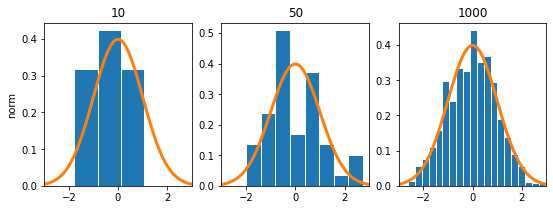

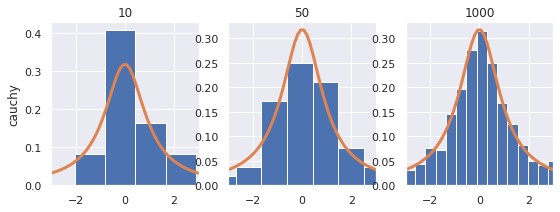

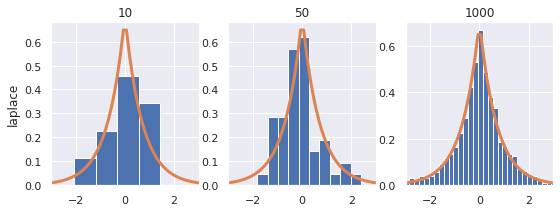

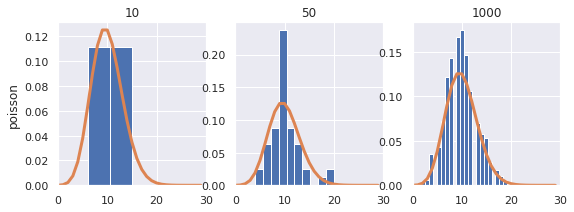

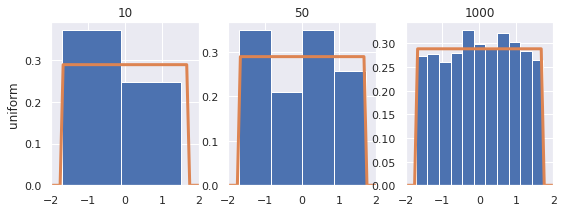

In [4]:
#fig, ax = plt.subplots(5, 3, figsize=(9, 15))

for i, (name, f, lm) in enumerate(zip(names, fs, limits)):
    #
    
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax[0].set_ylabel(name)
    for j, n in enumerate(num):
        
        bins = 'fd'
        if name == 'poisson':
            bins = np.arange(0, 31)
        
        plot(n, f, lm, ax[j], 'fd')
        ax[j].set_xlim(lm)
        ax[j].set_title(str(num[j]))
    plt.savefig(name + '.png')
    
#for j in range(len(num)):
#    ax[0][j].set_title(str(num[j]))


2
==


In [5]:
def characteristics(sample_size, distr, repeat=1000):
    
    col_names = ['mean', 'median', 'zR', 'zQ', 'ztr']
    df = pd.DataFrame(columns=col_names)
    r = sample_size // 4
    
    for i in range(repeat):
        
        sample = distr.rvs(sample_size)
        
        zR = (np.max(sample) + np.min(sample)) / 2
    
        q1, q3 = np.quantile(sample, 0.25, interpolation='higher'), \
        np.quantile(sample, 0.75, interpolation='higher')
    
        zQ = (q1 + q3) / 2
    

    
        ztr = np.mean(np.sort(sample)[r : -r])
    
        chars = [np.mean(sample), np.median(sample), zR, zQ, ztr]
        
        df.loc[i] = chars
        
    return df 
    
    

In [7]:
df = characteristics(10, norm(0, 1)).head()

df.head()

,mean,median,zR,zQ,ztr
0,-0.201470,-0.015399,-0.218696,-0.173956,-0.166826
1,-0.190731,-0.089068,-0.278158,-0.098022,-0.162128
2,-0.322825,-0.222592,-0.413278,-0.257609,-0.292259
3,0.328371,0.215597,1.106719,0.165565,0.136916
4,-0.115302,0.057259,-0.316624,0.111359,0.023942


In [8]:
E = np.mean(df)
D = np.mean(df **2)  - np.mean(df)** 2

In [9]:
a = np.tile(np.repeat(['mean', 'std'], 3), 5)
b = np.tile([10, 100, 1000], 2 * 5)

c = np.repeat(names, 6)

index =  pd.MultiIndex.from_tuples(list(zip(c, a, b)), names=["distrib", "char", "size"])

descript = pd.DataFrame(columns=['mean', 'median', 'zR', 'zQ', 'ztr'], index=index )
descript

mean median   zR   zQ  ztr
distrib char size                           
norm    mean 10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
        std  10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
cauchy  mean 10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
        std  10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
laplace mean 10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
        std  10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
poisson mean 10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
        std  10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
uniform mean 10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN
        std  10    NaN    NaN  NaN  NaN  NaN
             100   NaN    NaN  NaN  NaN  NaN
             1000  NaN    NaN  NaN  NaN  NaN

In [11]:

for f, name in zip(fs, names):
    for s in (10, 100, 1000):
        df = characteristics(s, f)
        for ch in ['mean', 'median', 'zR', 'zQ', 'ztr']:
            descript.at[(name, 'mean', s), ch] = np.mean(df[ch])
            descript.at[(name, 'std', s), ch] = np.mean(df[ch] **2)  - np.mean(df[ch])** 2

In [12]:
#print(descript.to_latex())
descript.loc['laplace']


# interval + E^hat

mean    median        zR        zQ       ztr
char size                                                  
mean 10    0.000517  0.007729 -0.011952   0.12525  0.004459
     100   0.002562 -0.001283  0.004967  0.016288  0.000811
     1000 -0.001033  -0.00076 -0.026873  0.001115 -0.000744
std  10    0.103051  0.075106  0.416301  0.094356  0.077021
     100   0.009869  0.005855  0.431466  0.009803  0.006127
     1000  0.000963  0.000505  0.394248  0.000973  0.000581

In [13]:
distribs = {name : None for name in names}



size = np.tile([10, 100, 1000], 5)
chars = np.repeat(['mean', 'median', 'zR', 'zQ', 'ztr'], 3) 


index =  pd.MultiIndex.from_tuples(list(zip(chars, size)), names=["char", "size"])

df_template = pd.DataFrame(columns=[ 'point estimate', 'std', 'left bound', 'right bound'], index=index )

# init 
for key in distribs:
    distribs[key] = df_template.copy()

In [ ]:
for key in distribs:
    print(distribs[key])

In [14]:
for f, name in zip(fs, names):
    for s in (10, 100, 1000):
        df = characteristics(s, f)
        for ch in ['mean', 'median', 'zR', 'zQ', 'ztr']:
            distribs[name].at[(ch, s), 'point estimate'] = np.mean(df[ch])
            distribs[name].at[(ch, s), 'std'] = np.mean(df[ch] **2)  - np.mean(df[ch])** 2
            distribs[name].at[(ch, s), 'left bound'] = distribs[name].at[(ch, s), 'point estimate'] - distribs[name].at[(ch, s), 'std']
            distribs[name].at[(ch, s), 'right bound'] = distribs[name].at[(ch, s), 'point estimate'] + distribs[name].at[(ch, s), 'std']
            
            
            #descript.at[(name, 'mean', s), ch] = np.mean(df[ch])
            #descript.at[(name, 'std', s), ch] = np.mean(df[ch] **2)  - np.mean(df[ch])** 2

In [16]:
distribs['norm']

point estimate       std left bound right bound
char   size                                                
mean   10        -0.010861  0.091955  -0.102816    0.081094
       100        0.000749  0.009284  -0.008535    0.010032
       1000       0.000221  0.001068  -0.000847    0.001288
median 10         0.001065  0.132545   -0.13148    0.133611
       100        0.000931  0.014112  -0.013182    0.015043
       1000       0.000783  0.001685  -0.000902    0.002468
zR     10        -0.027986  0.175808  -0.203793    0.147822
       100       -0.011303  0.088677   -0.09998    0.077373
       1000       0.007661  0.061478  -0.053817     0.06914
zQ     10         0.132156  0.109322   0.022834    0.241479
       100        0.015601  0.011589   0.004012     0.02719
       1000       0.002509  0.001266   0.001243    0.003774
ztr    10        -0.006152  0.104953  -0.111105      0.0988
       100        0.001897  0.011078  -0.009181    0.012975
       1000       0.000624  0.001303   -0.00068    0.001927

In [17]:
np.log10(np.array(distribs['norm']['std'], dtype='d'))

array([-1.03642532, -2.03227893, -2.9716076 , -0.877636  , -1.85039745,
       -2.77336133, -0.75496237, -1.05219046, -1.21127681, -0.96129171,
       -1.93595632, -2.89764189, -0.97900613, -1.95553048, -2.88497169])

In [24]:
np.floor(np.log10(12))

1.0

In [ ]:
distribs['norm'].loc['mean']

In [ ]:
np.log10(0.00001)

In [ ]:
chars(10, norm(0, 1)).head()

In [ ]:
np.sort([2, 3, 4])[2]

In [94]:
distribs['cauchy']

point estimate               std        left bound  \
char   size                                                      
mean   10         2.665383       4268.683117      -4266.017733   
       100         0.01211        162.377656       -162.365547   
       1000       1.262508        706.368474       -705.105966   
median 10        -0.010287          0.322436         -0.332723   
       100        0.003805           0.02464         -0.020835   
       1000      -0.000139          0.002561           -0.0027   
zR     10        13.442335     105549.313934    -105535.871599   
       100        1.142326     374865.756062    -374864.613736   
       1000     606.519166  174955400.460639 -174954793.941472   
zQ     10         0.333642          0.970791          -0.63715   
       100        0.031083          0.056064         -0.024982   
       1000       0.004185          0.005117         -0.000932   
ztr    10         0.002738          0.597984         -0.595246   
       100       -0.002478          0.027242          -0.02972   
       1000       0.000136          0.002575         -0.002439   

                  right bound  
char   size                    
mean   10           4271.3485  
       100         162.389766  
       1000        707.630981  
median 10            0.312149  
       100           0.028445  
       1000          0.002422  
zR     10       105562.756269  
       100      374866.898389  
       1000  174956006.979805  
zQ     10            1.304433  
       100           0.087147  
       1000          0.009302  
ztr    10            0.600722  
       100           0.024765  
       1000           0.00271

In [100]:
import copy

def round_by_std(df):
    
    df = copy.deepcopy(df)
    
    for i in range(len(df)):
        p = 10 ** int(np.floor(np.log10(df['std'][i])))
        df['point estimate'][i] = df['point estimate'][i] // p * p  
        df['left bound'][i] = df['left bound'][i] // p * p  
        df['right bound'][i] = df['right bound'][i] // p * p  
    df['std'] = df['std'].apply(lambda x: np.around(x, -int(np.floor(np.log10(x)))))
    
    return df

names = ['norm', 'cauchy', 'laplace', 'poisson', 'uniform']

print(\
"\\begin{center}\n\\begin{table}\n" + \
round_by_std(distribs['norm']).to_latex() + \
"\\caption{Точечные и интервальные оценки для нормального распределения}\n\\label{table_norm_1}\n\\end{table}\n\\end{center}\n"\
     )

print(\
"\\begin{center}\n\\begin{table}\n" + \
round_by_std(distribs['cauchy']).to_latex() + \
"\\caption{Точечные и интервальные оценки для распределения Коши}\n\\label{table1}\n\\end{table_cauchy_1}\n\\end{center}\n"\
     )


print(\
"\\begin{center}\n\\begin{table}\n" + \
round_by_std(distribs['laplace']).to_latex() + \
"\\caption{Точечные и интервальные оценки для распределения Лапласа}\n\\label{table1}\n\\end{table_laplace_1}\n\\end{center}\n"\
     )


print(\
"\\begin{center}\n\\begin{table}\n" + \
round_by_std(distribs['poisson']).to_latex() + \
"\\caption{Точечные и интервальные оценки для распределения Пуассона}\n\\label{table1}\n\\end{table_poisson_1}\n\\end{center}\n"\
     )


print(\
"\\begin{center}\n\\begin{table}\n" + \
round_by_std(distribs['uniform']).to_latex() + \
"\\caption{Точечные и интервальные оценки для равномерного распределения}\n\\label{table1}\n\\end{table_uniform_1}\n\\end{center}\n"\
     )

\begin{center}
\begin{table}
\begin{tabular}{lllrll}
\toprule
    &      & point estimate &    std & left bound & right bound \\
char & size &                &        &            &             \\
\midrule
mean & 10   &          -0.02 &  0.090 &      -0.11 &        0.08 \\
    & 100  &            0.0 &  0.009 &     -0.009 &        0.01 \\
    & 1000 &            0.0 &  0.001 &     -0.001 &       0.001 \\
median & 10   &            0.0 &  0.100 &       -0.2 &         0.1 \\
    & 100  &            0.0 &  0.010 &      -0.02 &        0.01 \\
    & 1000 &            0.0 &  0.002 &     -0.001 &       0.002 \\
zR & 10   &           -0.1 &  0.200 &       -0.3 &         0.1 \\
    & 100  &          -0.02 &  0.090 &       -0.1 &        0.07 \\
    & 1000 &            0.0 &  0.060 &      -0.06 &        0.06 \\
zQ & 10   &            0.1 &  0.100 &        0.0 &         0.2 \\
    & 100  &           0.01 &  0.010 &        0.0 &        0.02 \\
    & 1000 &          0.002 &  0.001 &      0.001 &    

In [ ]:
sample = norm(0, 1).rvs(10)
plt.boxplot(sample, whis=(5, 95))

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

№3
==

In [ ]:
for f in fs:
    for s in (20, 100):
        f.rvs(s)

In [ ]:
def q_out(sample_size, distr, repeat=1000):
    
    mean = 0
    for i in range(repeat):
    
        sample = distr.rvs(sample_size)
        q1, q3 = np.quantile(sample, 0.25, interpolation='higher'), \
        np.quantile(sample, 0.75, interpolation='higher')
    
        outliers = np.sum(sample < (q1 - 3 / 2 * (q3 - q1))) + np.sum(sample > q3 + 3 / 2 * (q3 - q1))
    
        mean = (mean * i + outliers / sample_size) / (i + 1)
    
    return mean 

def q_out_theor(distr):
    q1, q3 = distr.ppf(0.25), distr.ppf(0.75)
    q = distr.cdf(q1 - (q3 - q1) * 3 / 2) + 1 - distr.cdf(q3 + (q3 - q1) * 3 / 2)
    return q
    


посчитаем теоретически 

In [ ]:
def boxplot(sample_size, distr, ax):
    ax.boxplot(distr.rvs(sample_size))

    

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(6, 15))

for i, (name, f) in enumerate(zip(names, fs)):
    ax[i][0].set_ylabel(name)
    for j, n in enumerate([20, 100]):
        boxplot(n, f, ax[i][j])
        
for j in range(2):
    ax[0][j].set_title(str([20, 100][j]))


In [ ]:


index =  pd.MultiIndex.from_tuples(list(zip(c, a, b)), names=["distrib", "char", "size"])

descript = pd.DataFrame(columns=['theoretic_value', 
                                 'experimantal_value_20', 
                                 'experimantal_value_100', 
                                 'diff_20', 'diff_100'], index=names)
descript


In [ ]:
#def q_out(sample_size, distr, repeat=1000):
#def q_out_theor(distr):

for f, name in zip(fs, names):
    tv = q_out_theor(f)
    ev20 = q_out(20, f)
    ev100 = q_out(20, f)
    
    descript.at[name, 'theoretic_value'] = tv
    descript.at[name, 'experimantal_value_20'] = ev20
    descript.at[name, 'experimantal_value_100'] = ev100
    descript.at[name, 'diff_20'] = np.abs(ev20 - tv)
    descript.at[name, 'diff_100'] = np.abs(ev100 - tv)

In [ ]:
descript

In [ ]:
print(descript.to_latex())

In [ ]:
import seaborn as sns 


nums = [20, 60, 100]

In [ ]:
fs[0].rvs(60)

sns.ecdfplot(fs[0].rvs(60))


In [ ]:
sns.kdeplot(fs[0].rvs(100))

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(12, 15))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, (name, f, lm) in enumerate(zip(names, fs, limits)):
    ax[i][0].set_ylabel(name)
    for j, n in enumerate(nums):
        
        lm = (-4, 4)
        
        if name == 'poisson':
            lm = (6, 14)
        
        sns.kdeplot(f.rvs(n), ax = ax[i][j])
        ax[i][j].set_xlim(lm)
        
for j in range(len(num)):
    ax[0][j].set_title(str(nums[j]))

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(12, 15))

plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, (name, f, lm) in enumerate(zip(names, fs, limits)):
    ax[i][0].set_ylabel(name)
    for j, n in enumerate(nums):
        
        lm = (-4, 4)
        
        if name == 'poisson':
            lm = (6, 14)
        
        sns.ecdfplot(f.rvs(n), ax = ax[i][j])
        ax[i][j].set_xlim(lm)
        
for j in range(len(num)):
    ax[0][j].set_title(str(nums[j]))